In [20]:
import crantpy as cp
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cloudvolume as cv

In [21]:
os.getenv('CRANTTABLE_TOKEN')

'10331ac689913f85c62e9dcf4a410bcea0e87753'

In [22]:
cp.get_cave_client()

CAVEclient<datastack_name=kronauer_ant, server_address=https://proofreading.zetta.ai>

In [23]:
cp.get_cave_datastacks()

['kronauer_ant']

In [24]:
cp.get_cloudvolume()

In [25]:
df = cp.get_all_seatable_annotations(proofread_only=True)
df

,root_id,root_id_processed,supervoxel_id,position,nucleus_id,nucleus_position,root_position,cave_table,proofread,status,...,cell_subtype,cell_instance,known_nt,known_nt_source,alternative_names,annotator_notes,user_annotator,user_proofreader,ngl_link,date_proofread
1,576460752688452399,None,74100212167609429,"32121, 31509, 1702",72621025497478503,"36772, 28974, 1953","36772, 28974, 1953",None,True,[BACKBONE_PROOFREAD],...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, mALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
4,576460752662526105,None,74100280887219649,"32484, 32119, 1756",72691394308791443,"37240, 29878, 2178","37240, 29878, 2178",None,True,[BACKBONE_PROOFREAD],...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, mALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
10,576460752730083020,None,73959818410466857,"30679, 36273, 2063",576460752663596169,"36555, 31429, 1131","31346, 36052, 1320",None,True,[BACKBONE_PROOFREAD],...,None,None,None,None,None,None,[lindsey_lopes],[antonio_bollig],https://spelunker.cave-explorer.org/#!middleau...,None
11,576460752673660716,None,74099800052193579,"32399, 25210, 2517",None,None,None,None,True,[BACKBONE_PROOFREAD],...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, lALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
15,576460752678957397,None,74310974735406988,"34895, 26140, 1354",None,None,None,None,True,[BACKBONE_PROOFREAD],...,None,None,None,None,None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,576460752688799116,None,74170237179843045,"33127, 25985, 1063",None,None,None,None,True,[BACKBONE_PROOFREAD],...,None,None,None,None,None,None,[lindsey_lopes],[lindsey_lopes],None,2025-05-28
3247,576460752752343633,None,74240880667886624,"34452, 30063, 621",None,None,None,None,True,[BACKBONE_PROOFREAD],...,None,None,None,None,None,None,[lindsey_lopes],[lindsey_lopes],None,2025-05-28
3250,576460752704923787,None,73676968977149842,"25684, 15779, 1831",None,None,None,None,True,[BACKBONE_PROOFREAD],...,FBt4_ia,None,None,None,None,"inner processes, anterior side of layer",[hannah_haberkern],[antonio_bollig],None,2025-05-30
3252,576460752734482171,None,None,"36655, 27075, 1338",None,None,None,None,True,[BACKBONE_PROOFREAD],...,None,None,None,None,None,None,[lindsey_lopes],[lindsey_lopes],None,2025-07-10


In [42]:
df = cp.get_annotations(576460752688452399)

In [43]:
# Get integers in this string 
[int(x) for x in df.position.values[0].split(',')]

[32121, 31509, 1702]

In [45]:
df.nucleus_position.values[0]

'36772, 28974, 1953'

In [46]:
df.columns

Index(['root_id', 'root_id_processed', 'supervoxel_id', 'position',
       'nucleus_id', 'nucleus_position', 'root_position', 'cave_table',
       'proofread', 'status', 'region', 'proofreader_notes', 'side', 'nerve',
       'tract', 'hemilineage', 'flow', 'super_class', 'cell_class',
       'cell_type', 'cell_subtype', 'cell_instance', 'known_nt',
       'known_nt_source', 'alternative_names', 'annotator_notes',
       'user_annotator', 'user_proofreader', 'ngl_link', 'date_proofread'],
      dtype='object')

In [7]:
def nm_to_voxel(coord_nm, vol):
    res = vol.info['scales'][0]['resolution']
    offset = vol.info['scales'][0]['voxel_offset']
    return [(int((c / r) - o)) for c, r, o in zip(coord_nm, res, offset)]

In [8]:
def plot_image(x, y, z, size=500, mip=0):
    if mip != 0:
        raise ValueError("Only mip level 0 is supported for plotting images.")
    em_url = "precomputed://gs://dkronauer-ant-001-alignment-final/aligned"
    vol = cv.CloudVolume(em_url, mip=mip, use_https=True)  # use_https is often needed for GCP buckets
    img = vol[x-size//2:x+size//2, y-size//2:y+size//2, z:z+1]
    img = img.squeeze()
    return img 

Decompressing: 100%|██████████| 1/1 [00:00<00:00, 583.43it/s]


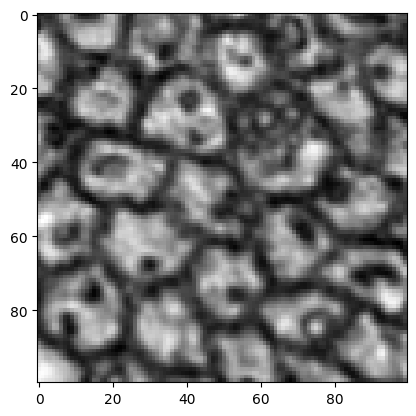

In [9]:
plt.imshow(plot_image(32889, 11632, 3221, size=100, mip=0), cmap='gray')

In [10]:
# Get a bunch of random neuron IDs for get_synapses 
pre_ids = df.sample(10, random_state=0)['root_id'].tolist()
pre_ids

['576460752660220059',
 '576460752728863078',
 '576460752670675408',
 '576460752729281253',
 '576460752715616024',
 '576460752741376453',
 '576460752667304188',
 '576460752665021160',
 '576460752661907178',
 '576460752667059954']

In [13]:
synapses = cp.get_synapses(pre_ids, post_ids=None)

In [14]:
synapses

,id,created,superceded_id,valid,size,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,pre_pt_position,post_pt_position,ctr_pt_position
0,6967067,2025-03-27 13:34:35.700037+00:00,NaN,t,57,72621712625180603,576460752667304188,72621712625205711,576460752662828325,"[83760, 160720, 64596]","[83552, 160720, 64680]","[83648, 160800, 64596]"
1,3768836,2025-03-27 13:34:35.700037+00:00,NaN,t,53,72480906417786445,576460752667059954,72480906417794311,576460752714846912,"[69552, 151392, 71232]","[69328, 151456, 71316]","[69424, 151424, 71358]"
2,3769106,2025-03-27 13:34:35.700037+00:00,NaN,t,122,72480906417847900,576460752667059954,72480906417845108,576460752513147115,"[69760, 151760, 72114]","[69728, 151936, 72198]","[69760, 151904, 72198]"
3,3768787,2025-03-27 13:34:35.700037+00:00,NaN,t,76,72480906417836857,576460752667059954,72480906417839443,576460752685532197,"[69520, 151328, 71988]","[69360, 151120, 72030]","[69405, 151233, 71968]"
4,10470860,2025-03-27 13:34:35.700037+00:00,NaN,t,14,72692081436565247,576460752667304188,72692081436570521,576460752411902185,"[96480, 160368, 76608]","[96464, 160400, 76734]","[96528, 160368, 76734]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2442,75399595,2025-03-27 13:34:35.700037+00:00,NaN,t,54,74098769058747739,576460752715616024,74098769058745158,576460752704891787,"[259200, 81728, 74592]","[259056, 81744, 74550]","[259104, 81792, 74550]"
2443,50043428,2025-03-27 13:34:35.700037+00:00,NaN,t,10,73536025330848599,576460752665021160,73536025330848599,576460752665021160,"[195328, 105616, 84924]","[195328, 105616, 84924]","[195408, 105600, 84924]"
2444,75400718,2025-03-27 13:34:35.700037+00:00,NaN,t,36,74098769058757654,576460752715616024,74098769058750143,576460752668538632,"[260032, 81456, 74718]","[260064, 81232, 74718]","[260128, 81344, 74760]"
2445,61831783,2025-03-27 13:34:35.700037+00:00,NaN,t,32,73887800466040810,576460752715616024,73887800466053046,576460752704891787,"[229744, 95680, 99120]","[229536, 95680, 99288]","[229664, 95728, 99246]"


In [ ]:
# They’re in 1nm x 1nm x 1nm — it’s an issue I’ve been trying to sort out with zetta, 
# but to get them in the correct voxel format you need to divide the x and y by 8 (nm) and the y by 42 (nm)

def get_synapse_coordinates(synapse):
    x, y, z = synapse['ctr_pt_position']
    x = int(x//8)
    y = int(y//8)
    z = int(z//42)
    return x, y, z

Synapse ID: 6967067, Pre-root: 576460752667304188, Post-root: 576460752662828325, Size: 57


Decompressing: 100%|██████████| 2/2 [00:00<00:00, 1658.16it/s]


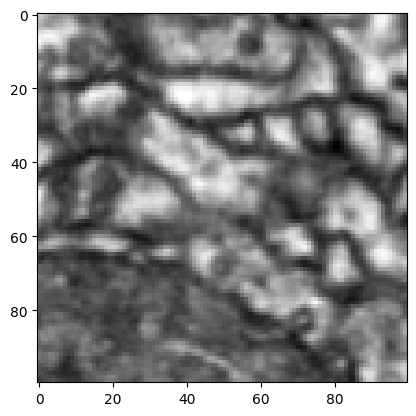

In [17]:
synapse = synapses.iloc[0]

pre_root = synapse['pre_pt_root_id'].astype(str)
post_root = synapse['post_pt_root_id'].astype(str)
synapse_id = synapse['id']
size = synapse['size']

print(f"Synapse ID: {synapse_id}, Pre-root: {pre_root}, Post-root: {post_root}, Size: {size}")

x, y, z = get_synapse_coordinates(synapse)

plt.imshow(plot_image(x, y, z, size=100, mip=0), cmap='gray')

Decompressing: 100%|██████████| 1/1 [00:00<00:00, 755.32it/s]


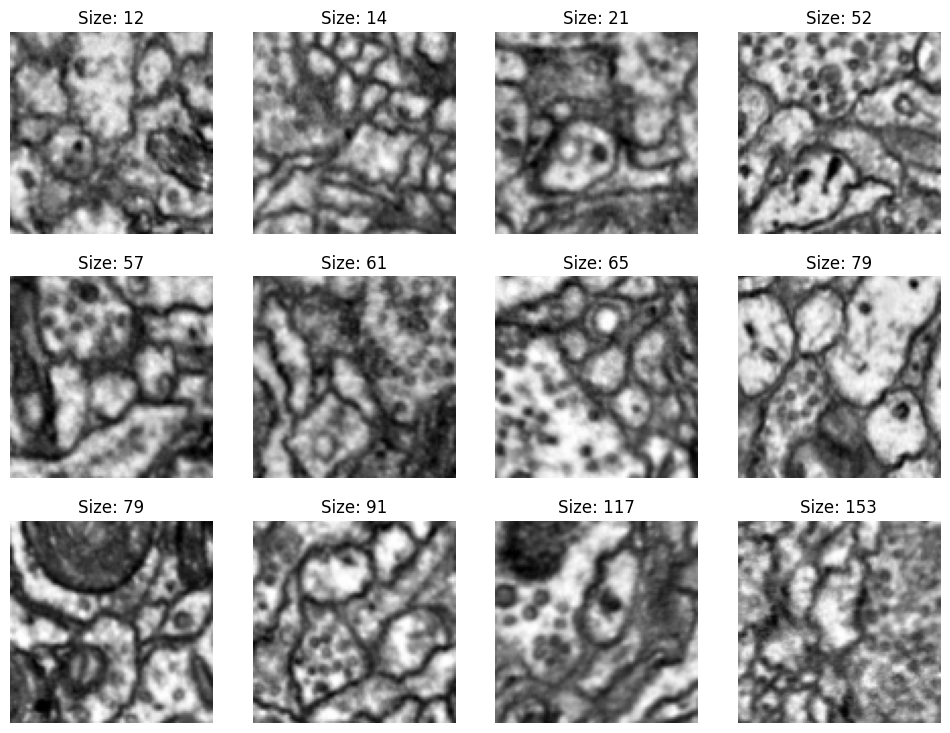

In [19]:
# Sample 12 synapses 

synapse_sample = synapses.sample(12, random_state=1).sort_values(by=['size']).reset_index(drop=True)

# Plot 3x4 grid of synapses 
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i, synapse in synapse_sample.iterrows():
    x, y, z = get_synapse_coordinates(synapse)
    ax = axs[i // 4, i % 4]
    ax.imshow(plot_image(x, y, z, size=100, mip=0), cmap='gray')
    ax.set_title(f"Size: {synapse['size']}")
    ax.axis('off')

In [ ]:
# Plot the pre and post synapse locations on the image, connect pre and post with a line

In [ ]:
# Pull the supervoxel mesh coordinates from CAVE to color pre/post synapses

In [ ]:
# Plot +/- 2 z slices around the synapse 
